--- 1. Thiết lập ---
Đang sử dụng thiết bị mps
Kích thước ảnh mục tiêu: 128x128
Batch size: 128
Số lượng epochs: 100
Tốc độ học: 0.001
Thư mục gốc dữ liệu: ./data

--- 2. Chuẩn bị Dataset và DataLoader ---
Đã định nghĩa các phép biến đổi dữ liệu
Tiến hành xử lý đường dẫn dữ liệu và kiểm tra file ảnh
Đang quét thư mục train: ./data/train/watermarked
Tìm thấy 1743 cặp ảnh hợp lệ cho Train.
Đang quét thư mục validation: ./data/val/watermarked
Tìm thấy 107 cặp ảnh hợp lệ cho Validation.

Đã bỏ qua tổng cộng 10767 ảnh không có cặp trong tập train.
Đã bỏ qua tổng cộng 3192 ảnh không có cặp trong tập validation.

Đã định nghĩa class WatermarkDataset và hàm loai_bo_none (collate_fn)

Đang tạo các đối tượng Dataset...
Đã tạo Dataset: 1743 train, 107 validation.

Đang tạo các đối tượng DataLoader...
Đã tạo DataLoader cho train và validation.

--- Kiểm tra DataLoader (Train) ---
Trạng thái: Lấy thành công 1 batch.
Kích thước batch ảnh watermarked: torch.Size([128, 3, 128, 128])
Kích thước batch ả

   => Lưu model tốt nhất: best_watermark_remover_model.pth (Val Loss: 0.366069)
Epoch [1/100] - Train Loss: 0.471197, Val Loss: 0.366069


   => Lưu model tốt nhất: best_watermark_remover_model.pth (Val Loss: 0.237396)
Epoch [2/100] - Train Loss: 0.293532, Val Loss: 0.237396


   => Lưu model tốt nhất: best_watermark_remover_model.pth (Val Loss: 0.199988)
Epoch [3/100] - Train Loss: 0.219958, Val Loss: 0.199988


   => Lưu model tốt nhất: best_watermark_remover_model.pth (Val Loss: 0.181490)
Epoch [4/100] - Train Loss: 0.193306, Val Loss: 0.181490


   => Lưu model tốt nhất: best_watermark_remover_model.pth (Val Loss: 0.167689)
Epoch [5/100] - Train Loss: 0.176301, Val Loss: 0.167689


   => Lưu model tốt nhất: best_watermark_remover_model.pth (Val Loss: 0.155340)
Epoch [6/100] - Train Loss: 0.163360, Val Loss: 0.155340


   => Lưu model tốt nhất: best_watermark_remover_model.pth (Val Loss: 0.148852)
Epoch [7/100] - Train Loss: 0.152514, Val Loss: 0.148852


   => Lưu model tốt nhất: best_watermark_remover_model.pth (Val Loss: 0.143071)
Epoch [8/100] - Train Loss: 0.146034, Val Loss: 0.143071


   => Lưu model tốt nhất: best_watermark_remover_model.pth (Val Loss: 0.136549)
Epoch [9/100] - Train Loss: 0.139664, Val Loss: 0.136549


   => Lưu model tốt nhất: best_watermark_remover_model.pth (Val Loss: 0.132799)
Epoch [10/100] - Train Loss: 0.133654, Val Loss: 0.132799


   => Lưu model tốt nhất: best_watermark_remover_model.pth (Val Loss: 0.131339)
Epoch [11/100] - Train Loss: 0.130423, Val Loss: 0.131339


   => Lưu model tốt nhất: best_watermark_remover_model.pth (Val Loss: 0.129272)
Epoch [12/100] - Train Loss: 0.127865, Val Loss: 0.129272


   => Lưu model tốt nhất: best_watermark_remover_model.pth (Val Loss: 0.125770)
Epoch [13/100] - Train Loss: 0.125086, Val Loss: 0.125770


   => Lưu model tốt nhất: best_watermark_remover_model.pth (Val Loss: 0.122863)
Epoch [14/100] - Train Loss: 0.123615, Val Loss: 0.122863


   => Lưu model tốt nhất: best_watermark_remover_model.pth (Val Loss: 0.122691)
Epoch [15/100] - Train Loss: 0.121051, Val Loss: 0.122691


   => Lưu model tốt nhất: best_watermark_remover_model.pth (Val Loss: 0.119312)
Epoch [16/100] - Train Loss: 0.119789, Val Loss: 0.119312


   => Lưu model tốt nhất: best_watermark_remover_model.pth (Val Loss: 0.118509)
Epoch [17/100] - Train Loss: 0.117073, Val Loss: 0.118509


   => Lưu model tốt nhất: best_watermark_remover_model.pth (Val Loss: 0.116694)
Epoch [18/100] - Train Loss: 0.115817, Val Loss: 0.116694


Epoch [19/100] - Train Loss: 0.115156, Val Loss: 0.118204


   => Lưu model tốt nhất: best_watermark_remover_model.pth (Val Loss: 0.114580)
Epoch [20/100] - Train Loss: 0.114323, Val Loss: 0.114580


   => Lưu model tốt nhất: best_watermark_remover_model.pth (Val Loss: 0.112693)
Epoch [21/100] - Train Loss: 0.112249, Val Loss: 0.112693


Epoch [22/100] - Train Loss: 0.110842, Val Loss: 0.113014


   => Lưu model tốt nhất: best_watermark_remover_model.pth (Val Loss: 0.111496)
Epoch [23/100] - Train Loss: 0.110929, Val Loss: 0.111496


   => Lưu model tốt nhất: best_watermark_remover_model.pth (Val Loss: 0.110903)
Epoch [24/100] - Train Loss: 0.109228, Val Loss: 0.110903


   => Lưu model tốt nhất: best_watermark_remover_model.pth (Val Loss: 0.110371)
Epoch [25/100] - Train Loss: 0.109067, Val Loss: 0.110371


   => Lưu model tốt nhất: best_watermark_remover_model.pth (Val Loss: 0.109040)
Epoch [26/100] - Train Loss: 0.107931, Val Loss: 0.109040


Epoch [27/100] - Train Loss: 0.108950, Val Loss: 0.110335


   => Lưu model tốt nhất: best_watermark_remover_model.pth (Val Loss: 0.107003)
Epoch [28/100] - Train Loss: 0.106600, Val Loss: 0.107003


   => Lưu model tốt nhất: best_watermark_remover_model.pth (Val Loss: 0.106062)
Epoch [29/100] - Train Loss: 0.105076, Val Loss: 0.106062


   => Lưu model tốt nhất: best_watermark_remover_model.pth (Val Loss: 0.105053)
Epoch [30/100] - Train Loss: 0.104954, Val Loss: 0.105053


   => Lưu model tốt nhất: best_watermark_remover_model.pth (Val Loss: 0.104222)
Epoch [31/100] - Train Loss: 0.103236, Val Loss: 0.104222


   => Lưu model tốt nhất: best_watermark_remover_model.pth (Val Loss: 0.103006)
Epoch [32/100] - Train Loss: 0.101972, Val Loss: 0.103006


   => Lưu model tốt nhất: best_watermark_remover_model.pth (Val Loss: 0.101447)
Epoch [33/100] - Train Loss: 0.102352, Val Loss: 0.101447


   => Lưu model tốt nhất: best_watermark_remover_model.pth (Val Loss: 0.100371)
Epoch [34/100] - Train Loss: 0.100536, Val Loss: 0.100371


Epoch [35/100] - Train Loss: 0.100122, Val Loss: 0.102551


Epoch [36/100] - Train Loss: 0.100120, Val Loss: 0.100735


   => Lưu model tốt nhất: best_watermark_remover_model.pth (Val Loss: 0.099518)
Epoch [37/100] - Train Loss: 0.099517, Val Loss: 0.099518


Epoch [38/100] - Train Loss: 0.098953, Val Loss: 0.102777


   => Lưu model tốt nhất: best_watermark_remover_model.pth (Val Loss: 0.097893)
Epoch [39/100] - Train Loss: 0.098070, Val Loss: 0.097893


   => Lưu model tốt nhất: best_watermark_remover_model.pth (Val Loss: 0.096882)
Epoch [40/100] - Train Loss: 0.096540, Val Loss: 0.096882


   => Lưu model tốt nhất: best_watermark_remover_model.pth (Val Loss: 0.096345)
Epoch [41/100] - Train Loss: 0.096394, Val Loss: 0.096345


   => Lưu model tốt nhất: best_watermark_remover_model.pth (Val Loss: 0.096113)
Epoch [42/100] - Train Loss: 0.096681, Val Loss: 0.096113


Epoch [43/100] - Train Loss: 0.095452, Val Loss: 0.099686


   => Lưu model tốt nhất: best_watermark_remover_model.pth (Val Loss: 0.095630)
Epoch [44/100] - Train Loss: 0.096000, Val Loss: 0.095630


Epoch [45/100] - Train Loss: 0.095303, Val Loss: 0.096460


Epoch [46/100] - Train Loss: 0.097710, Val Loss: 0.097675


   => Lưu model tốt nhất: best_watermark_remover_model.pth (Val Loss: 0.094125)
Epoch [47/100] - Train Loss: 0.095050, Val Loss: 0.094125


   => Lưu model tốt nhất: best_watermark_remover_model.pth (Val Loss: 0.093861)
Epoch [48/100] - Train Loss: 0.093483, Val Loss: 0.093861


Epoch [49/100] - Train Loss: 0.092919, Val Loss: 0.094860


   => Lưu model tốt nhất: best_watermark_remover_model.pth (Val Loss: 0.093049)
Epoch [50/100] - Train Loss: 0.093168, Val Loss: 0.093049


Epoch [51/100] - Train Loss: 0.092398, Val Loss: 0.096816


   => Lưu model tốt nhất: best_watermark_remover_model.pth (Val Loss: 0.092247)
Epoch [52/100] - Train Loss: 0.092887, Val Loss: 0.092247


Epoch [53/100] - Train Loss: 0.092328, Val Loss: 0.093751


Epoch [54/100] - Train Loss: 0.092930, Val Loss: 0.097288


Epoch [55/100] - Train Loss: 0.092789, Val Loss: 0.093050


   => Lưu model tốt nhất: best_watermark_remover_model.pth (Val Loss: 0.092160)
Epoch [56/100] - Train Loss: 0.091956, Val Loss: 0.092160


   => Lưu model tốt nhất: best_watermark_remover_model.pth (Val Loss: 0.091308)
Epoch [57/100] - Train Loss: 0.091233, Val Loss: 0.091308


Epoch [58/100] - Train Loss: 0.091586, Val Loss: 0.091834


   => Lưu model tốt nhất: best_watermark_remover_model.pth (Val Loss: 0.090656)
Epoch [59/100] - Train Loss: 0.090379, Val Loss: 0.090656


Epoch [60/100] - Train Loss: 0.090716, Val Loss: 0.091405


Epoch [61/100] - Train Loss: 0.090458, Val Loss: 0.094215


Epoch [62/100] - Train Loss: 0.092431, Val Loss: 0.094516


   => Lưu model tốt nhất: best_watermark_remover_model.pth (Val Loss: 0.090333)
Epoch [63/100] - Train Loss: 0.090628, Val Loss: 0.090333


   => Lưu model tốt nhất: best_watermark_remover_model.pth (Val Loss: 0.089785)
Epoch [64/100] - Train Loss: 0.089336, Val Loss: 0.089785


Epoch [65/100] - Train Loss: 0.089386, Val Loss: 0.090989


Epoch [66/100] - Train Loss: 0.089081, Val Loss: 0.091630


Epoch [67/100] - Train Loss: 0.089354, Val Loss: 0.093818


Epoch [68/100] - Train Loss: 0.089954, Val Loss: 0.093089


Epoch [69/100] - Train Loss: 0.089536, Val Loss: 0.093125


Epoch [70/100] - Train Loss: 0.089166, Val Loss: 0.091183


Epoch [71/100] - Train Loss: 0.089152, Val Loss: 0.089883


   => Lưu model tốt nhất: best_watermark_remover_model.pth (Val Loss: 0.088002)
Epoch [72/100] - Train Loss: 0.088285, Val Loss: 0.088002


Epoch [73/100] - Train Loss: 0.087086, Val Loss: 0.089403


Epoch [74/100] - Train Loss: 0.087492, Val Loss: 0.088045


   => Lưu model tốt nhất: best_watermark_remover_model.pth (Val Loss: 0.087851)
Epoch [75/100] - Train Loss: 0.087549, Val Loss: 0.087851


Epoch [76/100] - Train Loss: 0.086743, Val Loss: 0.088017


Epoch [77/100] - Train Loss: 0.087160, Val Loss: 0.090669


   => Lưu model tốt nhất: best_watermark_remover_model.pth (Val Loss: 0.087490)
Epoch [78/100] - Train Loss: 0.086991, Val Loss: 0.087490


Epoch [79/100] - Train Loss: 0.086835, Val Loss: 0.087569


   => Lưu model tốt nhất: best_watermark_remover_model.pth (Val Loss: 0.086636)
Epoch [80/100] - Train Loss: 0.086903, Val Loss: 0.086636


Epoch [81/100] - Train Loss: 0.086181, Val Loss: 0.087535


   => Lưu model tốt nhất: best_watermark_remover_model.pth (Val Loss: 0.086613)
Epoch [82/100] - Train Loss: 0.086081, Val Loss: 0.086613


   => Lưu model tốt nhất: best_watermark_remover_model.pth (Val Loss: 0.086374)
Epoch [83/100] - Train Loss: 0.086245, Val Loss: 0.086374


Epoch [84/100] - Train Loss: 0.086774, Val Loss: 0.086773


Epoch [85/100] - Train Loss: 0.086413, Val Loss: 0.086468


Epoch [86/100] - Train Loss: 0.085796, Val Loss: 0.088030


Epoch [87/100] - Train Loss: 0.086357, Val Loss: 0.087007


Epoch [88/100] - Train Loss: 0.086204, Val Loss: 0.088669


Epoch [89/100] - Train Loss: 0.085766, Val Loss: 0.087698


   => Lưu model tốt nhất: best_watermark_remover_model.pth (Val Loss: 0.085559)
Epoch [90/100] - Train Loss: 0.085635, Val Loss: 0.085559


Epoch [91/100] - Train Loss: 0.085972, Val Loss: 0.087295


Epoch [92/100] - Train Loss: 0.084931, Val Loss: 0.086042


Epoch [93/100] - Train Loss: 0.086185, Val Loss: 0.086386


   => Lưu model tốt nhất: best_watermark_remover_model.pth (Val Loss: 0.085276)
Epoch [94/100] - Train Loss: 0.085488, Val Loss: 0.085276


Epoch [95/100] - Train Loss: 0.084256, Val Loss: 0.086873


Epoch [96/100] - Train Loss: 0.085736, Val Loss: 0.090738


Epoch [97/100] - Train Loss: 0.087175, Val Loss: 0.086319


   => Lưu model tốt nhất: best_watermark_remover_model.pth (Val Loss: 0.084857)
Epoch [98/100] - Train Loss: 0.085218, Val Loss: 0.084857


Epoch [99/100] - Train Loss: 0.084624, Val Loss: 0.085807


Epoch [100/100] - Train Loss: 0.084792, Val Loss: 0.086051
--- Huấn luyện hoàn tất ---


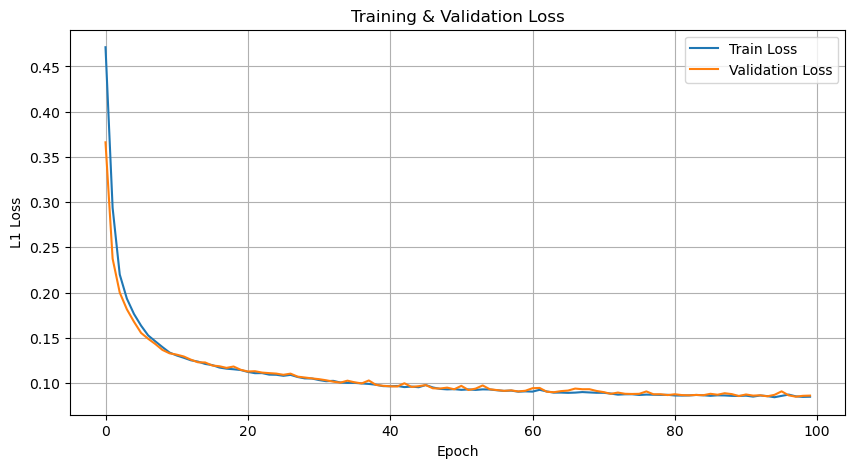


--- 5. Trực quan hóa kết quả ---
Đã tải model tốt nhất từ 'best_watermark_remover_model.pth'


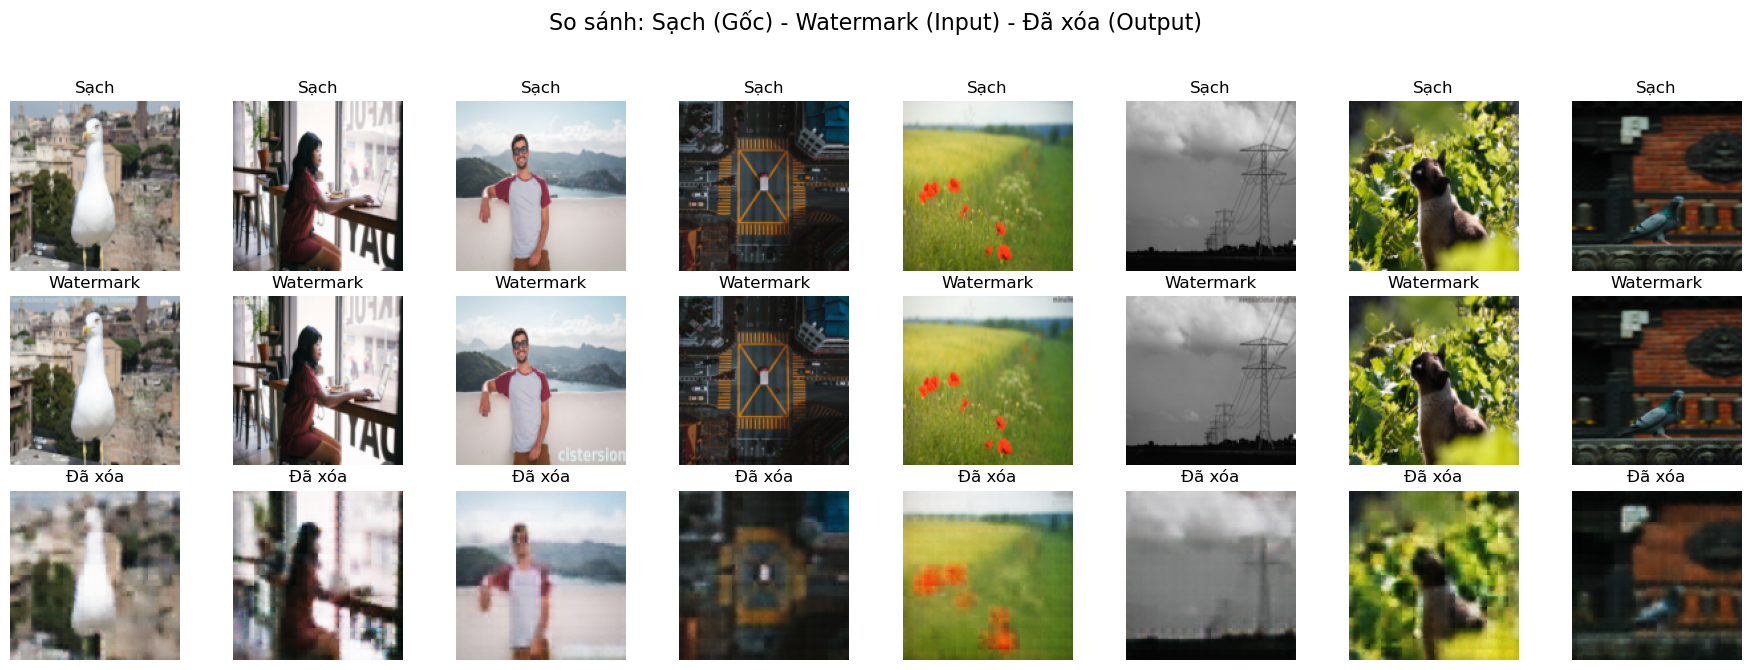


Chương trình Bài 4 hoàn tất.


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import os
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import time
import copy

print("--- 1. Thiết lập ---")

if torch.backends.mps.is_available():
    device = torch.device('mps')
elif torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')
print(f"Đang sử dụng thiết bị {device}")

batch_size = 128
epochs = 100
learning_rate = 1e-3
img_size = 128
data_root_dir = './data'

print(f"Kích thước ảnh mục tiêu: {img_size}x{img_size}")
print(f"Batch size: {batch_size}")
print(f"Số lượng epochs: {epochs}")
print(f"Tốc độ học: {learning_rate}")
print(f"Thư mục gốc dữ liệu: {data_root_dir}")

print("\n--- 2. Chuẩn bị Dataset và DataLoader ---")

data_transform = transforms.Compose([
    transforms.Resize((img_size, img_size)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])
print(f"Đã định nghĩa các phép biến đổi dữ liệu")

print(f"Tiến hành xử lý đường dẫn dữ liệu và kiểm tra file ảnh")
train_images_pair = []
val_images_pair = []
data_valid = True
skipped_train_count = 0
skipped_val_count = 0

train_cleaned_dir = os.path.join(data_root_dir, 'train', 'cleaned')
train_watermarked_dir = os.path.join(data_root_dir, 'train', 'watermarked')

if not os.path.isdir(train_cleaned_dir):
    print(f"LỖI: Thư mục {train_cleaned_dir} không tồn tại")
    data_valid = False
if not os.path.isdir(train_watermarked_dir):
    print(f"LỖI: Thư mục {train_watermarked_dir} không tồn tại")
    data_valid = False

if data_valid:
    print(f"Đang quét thư mục train: {train_watermarked_dir}")
    try:
        train_files = sorted([
            f for f in os.listdir(train_watermarked_dir)
            if f.lower().endswith(('.png', '.jpg', '.jpeg'))
        ])
        if not train_files:
            print(f"Cảnh báo: Không tìm thấy file ảnh nào trong {train_watermarked_dir}")
        for file_name in train_files:
            watermarked_path = os.path.join(train_watermarked_dir, file_name)
            cleaned_path = os.path.join(train_cleaned_dir, file_name)
            if os.path.isfile(cleaned_path):
                train_images_pair.append((watermarked_path, cleaned_path))
            else:
                skipped_train_count += 1
        if not train_images_pair:
            print(f"LỖI: Không tạo được cặp ảnh hợp lệ nào cho tập Train.")
            data_valid = False
        else:
            print(f"Tìm thấy {len(train_images_pair)} cặp ảnh hợp lệ cho Train.")
    except Exception as e:
        print(f"Lỗi khi quét thư mục {train_watermarked_dir}: {e}")
        data_valid = False

if data_valid:
    val_cleaned_dir = os.path.join(data_root_dir, 'val', 'cleaned')
    val_watermarked_dir = os.path.join(data_root_dir, 'val', 'watermarked')
    val_dirs_exist = True
    if not os.path.isdir(val_cleaned_dir):
        print(f"LỖI: Thư mục {val_cleaned_dir} không tồn tại")
        val_dirs_exist = False
        data_valid = False
    if not os.path.isdir(val_watermarked_dir):
        print(f"LỖI: Thư mục {val_watermarked_dir} không tồn tại")
        val_dirs_exist = False
        data_valid = False

    if val_dirs_exist:
        print(f"Đang quét thư mục validation: {val_watermarked_dir}")
        try:
            val_files = sorted([
                f for f in os.listdir(val_watermarked_dir)
                if f.lower().endswith(('.png', '.jpg', '.jpeg'))
            ])
            if not val_files:
                print(f"Cảnh báo: Không tìm thấy file ảnh nào trong {val_watermarked_dir}")
            for file_name in val_files:
                watermarked_path = os.path.join(val_watermarked_dir, file_name)
                cleaned_path = os.path.join(val_cleaned_dir, file_name)
                if os.path.isfile(cleaned_path):
                    val_images_pair.append((watermarked_path, cleaned_path))
                else:
                    skipped_val_count += 1
            if not val_images_pair:
                print(f"Cảnh báo: Không tạo được cặp ảnh hợp lệ nào cho tập Validation.")
            else:
                print(f"Tìm thấy {len(val_images_pair)} cặp ảnh hợp lệ cho Validation.")
        except Exception as e:
            print(f"Lỗi khi quét thư mục {val_watermarked_dir}: {e}")
            data_valid = False

if skipped_train_count > 0: print(f"\nĐã bỏ qua tổng cộng {skipped_train_count} ảnh không có cặp trong tập train.")
if skipped_val_count > 0: print(f"Đã bỏ qua tổng cộng {skipped_val_count} ảnh không có cặp trong tập validation.")

class WatermarkDataset(Dataset):
    def __init__(self, images_pair, transform=None):
        self.images_pair = images_pair
        self.transform = transform

    def __len__(self):
        return len(self.images_pair)

    def __getitem__(self, idx):
        if idx >= len(self.images_pair): raise IndexError("Index out of range")
        watermarked_path, cleaned_path = self.images_pair[idx]
        try:
            watermarked_image = Image.open(watermarked_path).convert('RGB')
            cleaned_image = Image.open(cleaned_path).convert('RGB')
            if self.transform:
                watermarked_image = self.transform(watermarked_image)
                cleaned_image = self.transform(cleaned_image)
            return watermarked_image, cleaned_image
        except Exception as e:
            print(f"Cảnh báo [getitem]: Lỗi khi xử lý cặp ảnh index {idx} ('{os.path.basename(watermarked_path)}'): {e}. Trả về None.")
            return None

def loai_bo_none(batch):
    batch_filtered = list(filter(lambda x: x is not None, batch))
    if not batch_filtered: return None
    try:
        return torch.utils.data.dataloader.default_collate(batch_filtered)
    except Exception as e:
        print(f"LỖI trong default_collate: {e}")
        return None

print(f"\nĐã định nghĩa class WatermarkDataset và hàm loai_bo_none (collate_fn)")

train_loader = None
val_loader = None

if data_valid and train_images_pair:
    print("\nĐang tạo các đối tượng Dataset...")
    train_dataset = WatermarkDataset(images_pair=train_images_pair, transform=data_transform)
    if val_images_pair:
        val_dataset = WatermarkDataset(images_pair=val_images_pair, transform=data_transform)
        print(f"Đã tạo Dataset: {len(train_dataset)} train, {len(val_dataset)} validation.")
    else:
        val_dataset = None
        print(f"Đã tạo Dataset: {len(train_dataset)} train, 0 validation.")

    print("\nĐang tạo các đối tượng DataLoader...")
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=0, pin_memory=True, collate_fn=loai_bo_none)
    if val_dataset:
        val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=0, pin_memory=True, collate_fn=loai_bo_none)
        print(f"Đã tạo DataLoader cho train và validation.")
    else:
        print(f"Đã tạo DataLoader cho train (không có validation loader).")

    print(f"\n--- Kiểm tra DataLoader (Train) ---")
    try:
        batch_data = next(iter(train_loader))
        if batch_data is None: raise ValueError("Batch đầu tiên từ Train Loader là None.")
        watermarked_check, clean_check = batch_data
        print(f"Trạng thái: Lấy thành công 1 batch.")
        print(f"Kích thước batch ảnh watermarked: {watermarked_check.size()}")
        print(f"Kích thước batch ảnh sạch: {clean_check.size()}")
        print(f"==> Kiểm tra DataLoader thành công. ===")
    except StopIteration: print("Lỗi: Train Loader rỗng.")
    except ValueError as ve: print(f"Lỗi khi kiểm tra DataLoader: {ve}")
    except Exception as e: print(f"Lỗi không xác định khi kiểm tra DataLoader: {e}")
    print(f"---------------------------------")
else:
    print("\n!!! Dữ liệu không hợp lệ hoặc không tìm thấy/không có cặp ảnh hợp lệ. Không thể tạo Dataset/DataLoader. !!!")


if train_loader: # Chỉ chạy nếu train_loader hợp lệ (val_loader có thể None)
    print("\n--- 3. Định nghĩa Mô hình ---")
    class WatermarkRemoverAE(nn.Module):
        def __init__(self, img_channels=3):
            super().__init__()
            self.encoder = nn.Sequential(
                nn.Conv2d(img_channels, 32, 3, 1, 1), nn.ReLU(True), nn.MaxPool2d(2, 2),
                nn.Conv2d(32, 64, 3, 1, 1), nn.ReLU(True), nn.MaxPool2d(2, 2),
                nn.Conv2d(64, 128, 3, 1, 1), nn.ReLU(True), nn.MaxPool2d(2, 2)
            )
            self.decoder = nn.Sequential(
                nn.ConvTranspose2d(128, 64, 2, 2), nn.ReLU(True),
                nn.ConvTranspose2d(64, 32, 2, 2), nn.ReLU(True),
                nn.ConvTranspose2d(32, img_channels, 2, 2),
                nn.Tanh()
            )
        def forward(self, x):
            x = self.encoder(x); x = self.decoder(x); return x

    model = WatermarkRemoverAE(img_channels=3).to(device)
    print("Đã khởi tạo mô hình WatermarkRemoverAE (CAE).")

    print("\n--- 4. Thiết lập Huấn luyện ---")
    criterion = nn.L1Loss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    print(f"Sử dụng Loss: {criterion.__class__.__name__}, Optimizer: Adam, LR={learning_rate}")

    print("\n--- Bắt đầu Huấn luyện ---")
    history = {'train_loss': [], 'val_loss': []}
    best_val_loss = float('inf')
    model_save_path = 'best_watermark_remover_model.pth'

    for epoch in range(epochs):
        model.train()
        train_loss = 0.0
        train_iterator = tqdm(train_loader, desc=f'Epoch {epoch+1}/{epochs} [Train]', leave=False)
        batch_count_train = 0
        for batch_data in train_iterator:
            if batch_data is None: continue
            batch_count_train += 1
            watermarked_batch, clean_batch = batch_data
            watermarked_batch, clean_batch = watermarked_batch.to(device), clean_batch.to(device)
            optimizer.zero_grad(); outputs = model(watermarked_batch); loss = criterion(outputs, clean_batch)
            loss.backward(); optimizer.step()
            train_loss += loss.item(); train_iterator.set_postfix(loss=f"{loss.item():.6f}")
        avg_train_loss = train_loss / max(1, batch_count_train)
        history['train_loss'].append(avg_train_loss)

        avg_val_loss = float('nan') # Giá trị mặc định nếu không có val_loader
        if val_loader: # Chỉ chạy validation nếu val_loader tồn tại
            model.eval()
            val_loss = 0.0
            val_iterator = tqdm(val_loader, desc=f'Epoch {epoch+1}/{epochs} [Val]', leave=False)
            batch_count_val = 0
            with torch.no_grad():
                for batch_data in val_iterator:
                    if batch_data is None: continue
                    batch_count_val += 1
                    watermarked_batch, clean_batch = batch_data
                    watermarked_batch, clean_batch = watermarked_batch.to(device), clean_batch.to(device)
                    outputs = model(watermarked_batch); loss = criterion(outputs, clean_batch)
                    val_loss += loss.item(); val_iterator.set_postfix(loss=f"{loss.item():.6f}")
            avg_val_loss = val_loss / max(1, batch_count_val)
            history['val_loss'].append(avg_val_loss)

            if avg_val_loss < best_val_loss:
                best_val_loss = avg_val_loss
                torch.save(model.state_dict(), model_save_path)
                print(f"   => Lưu model tốt nhất: {model_save_path} (Val Loss: {best_val_loss:.6f})")
        else:
             history['val_loss'].append(float('nan')) # Thêm nan nếu không có val loss

        print(f"Epoch [{epoch+1}/{epochs}] - Train Loss: {avg_train_loss:.6f}, Val Loss: {avg_val_loss:.6f}")

    print("--- Huấn luyện hoàn tất ---")

    plt.figure(figsize=(10, 5))
    plt.plot(history['train_loss'], label='Train Loss')
    if val_loader: # Chỉ vẽ val_loss nếu có
        plt.plot(history['val_loss'], label='Validation Loss')
    plt.title('Training & Validation Loss'); plt.xlabel('Epoch'); plt.ylabel('L1 Loss'); plt.legend(); plt.grid(True); plt.show()

    print("\n--- 5. Trực quan hóa kết quả ---")
    if val_loader: # Chỉ trực quan hóa nếu có val_loader
        best_model = WatermarkRemoverAE(img_channels=3).to(device)
        try:
            if os.path.exists(model_save_path):
                best_model.load_state_dict(torch.load(model_save_path, map_location=device))
                print(f"Đã tải model tốt nhất từ '{model_save_path}'")
            else:
                 print(f"Không tìm thấy file '{model_save_path}'. Sử dụng model cuối cùng.")
                 best_model = model
        except Exception as load_err:
            print(f"Lỗi tải model: {load_err}. Sử dụng model cuối cùng.")
            best_model = model
        best_model.eval()

        vis_batch = None
        try:
             vis_iter = iter(val_loader)
             while vis_batch is None: vis_batch = next(vis_iter)
        except StopIteration: print("Lỗi: Val loader rỗng khi trực quan hóa.")
        except Exception as e: print(f"Lỗi lấy batch val: {e}")

        if vis_batch:
            watermarked_vis, clean_vis = vis_batch
            watermarked_vis = watermarked_vis.to(device)
            with torch.no_grad(): denoised_vis = best_model(watermarked_vis)

            def prepare_for_display(tensor):
                if tensor is None : return None
                img_np = tensor.detach().cpu().numpy(); img_np = np.transpose(img_np, (0, 2, 3, 1))
                img_np = img_np * 0.5 + 0.5 # Denormalize
                img_np = np.clip(img_np, 0, 1); return img_np

            clean_np = prepare_for_display(clean_vis)
            watermarked_np = prepare_for_display(watermarked_vis.cpu())
            denoised_np = prepare_for_display(denoised_vis)

            if clean_np is not None and watermarked_np is not None and denoised_np is not None:
                n_display = min(8, len(clean_np))
                plt.figure(figsize=(18, 7)); plt.suptitle("So sánh: Sạch (Gốc) - Watermark (Input) - Đã xóa (Output)", fontsize=16)
                for i in range(n_display):
                    ax=plt.subplot(3,n_display,i+1); plt.imshow(clean_np[i]); ax.set_title("Sạch"); ax.axis('off')
                    ax=plt.subplot(3,n_display,i+1+n_display); plt.imshow(watermarked_np[i]); ax.set_title("Watermark"); ax.axis('off')
                    ax=plt.subplot(3,n_display,i+1+2*n_display); plt.imshow(denoised_np[i]); ax.set_title("Đã xóa"); ax.axis('off')
                plt.tight_layout(rect=[0, 0.03, 1, 0.95]); plt.show()
            else: print("Không thể hiển thị do lỗi chuẩn bị ảnh.")
        else: print("Không thể trực quan hóa do lỗi lấy batch.")
    else:
        print("Bỏ qua trực quan hóa vì không có dữ liệu validation.")

    print("\nChương trình Bài 4 hoàn tất.")

else:
    print("\nDo có lỗi ở bước chuẩn bị dữ liệu, các bước Model, Training, Evaluation không được thực thi.")